In [413]:
import numpy as np
import irreducible_library as irr
import os, sys
import matplotlib.pyplot as plt
import scipy
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
%load_ext autoreload
plt.style.use('default')
from matplotlib import rc, colors
# Make use of TeX\ufeff

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

rc('font',**{'size':16, 'family':'serif','serif':['Times New Roman']})
#plt.rcParams['text.usetex'] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Collecting Data

In [274]:
def load_csv(file_path):
    """
    Load a CSV file into a numpy array.

    Parameters:
        file_path (str): The path to the CSV file.

    Returns:
        numpy.ndarray: The numpy array containing the data.
    """
    try:
        data = np.genfromtxt(file_path, delimiter=',', skip_header=1)
        return data
    except Exception as e:
        print("Error loading CSV file:", e)
        return None

file_path = "datadump/TRGBbound.csv"
array_data = load_csv(file_path)
#array_data = array_data[array_data[:,0].argsort()]
#print(array_data[-1])
x = np.empty(len(array_data)+1)
y = np.empty(len(array_data)+1)

x[0] = 0.00022461523932453724 
y[0] = 7.196856730011558e-15

for i in range(len(array_data)):
    x[i+1]=array_data[i][0]
    y[i+1]=array_data[i][1]

[[1.75611920e+01 1.74967645e-09]
 [5.55333651e+01 1.74967645e-09]
 [1.55317595e+02 1.74967645e-09]
 [1.02617317e+03 1.74967645e-09]
 [1.60159974e+03 1.74967645e-09]]


In [42]:
#everything in units where c=hbar=1 and the energies are in MeV
me = 0.511
mmu=105.658
alpha_em = 1/137.
e = np.sqrt(alpha_em*4*np.pi)
Mpl = 2.435e21 #reduced planck mass (i.e. factor of 8 pi)
cm2_conv = 2.5e21
costhetaW = 0.881

In [4]:
mlist1 = np.logspace(-6,0,num = 25)
freeze_in = np.loadtxt("datadump/fullrangefreezeinline.txt")
freeze_in_func = scipy.interpolate.interp1d(freeze_in[0],freeze_in[1], kind = "quadratic",fill_value="extrapolate")

#mlist2 = np.logspace(-9,0,num = 25)
#freeze_in = np.loadtxt("datadump/LowMassAbundance-1.txt")
#freeze_in_func = scipy.interpolate.interp1d(mlist2[2:],freeze_in[2:], kind = "quadratic",fill_value="extrapolate")

In [5]:
#plt.loglog(mlist2,np.array([freeze_in_func(i) for i in mlist2]))
#plt.loglog(mlist2,freeze_in)
#plt.loglog(mlist1,np.array([freeze_in_func(i) for i in mlist1]))

## Signal-To-Noise


In [6]:
I = np.array([[0.001,7.8033, 97766.64229485039],
[1.1853765521484326e-16,1.052e-12, 1.4050380975813941e-8]])
II = np.array([[0.0010306061113598667,14.639, 100145.2790165795],
[2.449863058799726e-17,4.104e-13,  2.903845976396403e-9]])
III = np.array([[0.001028684261087717,20.886, 99958.53043279848],
[5.5396757921213996e-18,1.3359e-13, 6.56623038651541e-10]])
BDM = np.array([[0.001028684261087717, 99958.53043279848],
[5.736467639337131e-16, 6.799489634077243e-8]])

print(np.log10(I[1][0]/I[1][1])/np.log10(I[0][0]/I[0][1]))

1.0143569137175326


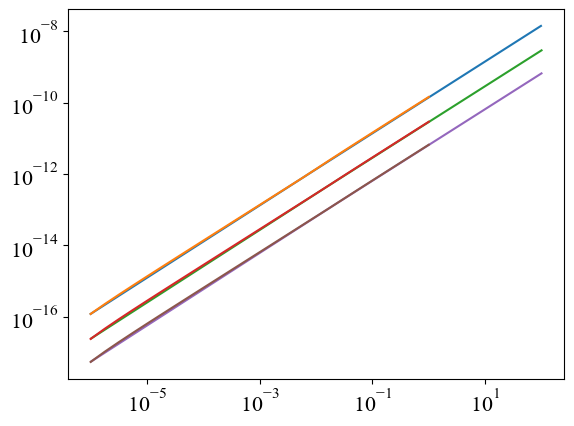

In [7]:
I_int = scipy.interpolate.interp1d(I[0]/10**3,I[1], kind = "linear", fill_value="extrapolate")
II_int = scipy.interpolate.interp1d(II[0]/10**3,II[1], kind = "linear", fill_value="extrapolate")
III_int = scipy.interpolate.interp1d(III[0]/10**3,III[1], kind = "linear", fill_value="extrapolate")
plt.loglog(I[0]/10**3,I[1])
plt.loglog(mlist1,np.array([I_int(i) for i in mlist1]))
plt.loglog(II[0]/10**3,II[1])
plt.loglog(mlist1,np.array([II_int(i) for i in mlist1]))
plt.loglog(III[0]/10**3,III[1])
plt.loglog(mlist1,np.array([III_int(i) for i in mlist1]))
plt.show()

In [8]:
print(np.log10(500))

2.6989700043360187


In [9]:
mlist = np.logspace(-6,2.7, num = 400)
Qlist = np.logspace(-19,-9, num = 400)

snrI = np.empty((400,400))

for i in range(400):
    for n in range(400):
        s = (Qlist[i]/mlist[n])**4*(mlist[n]/(I_int(mlist[n])))**4*(Qlist[i]/(freeze_in_func(mlist[n])))**4
        #if s > 1:
        #    snrI[i][n] = 1
        #else:
        snrI[i][n] = s

snrII = np.empty((400,400))

for i in range(400):
    for n in range(400):
        s = (Qlist[i]/mlist[n])**4*(mlist[n]/(II_int(mlist[n])))**4*(Qlist[i]/(freeze_in_func(mlist[n])))**4
        #if s > 1:
        #    snrII[i][n] = 1
        #else:
        snrII[i][n] = s

snrIII = np.empty((400,400))

for i in range(400):
    for n in range(400):
        s = (Qlist[i]/mlist[n])**4*(mlist[n]/(III_int(mlist[n])))**4*(Qlist[i]/(freeze_in_func(mlist[n])))**4
        #if s > 1:
        #    snrIII[i][n] = 1
        #else:
        snrIII[i][n] = s

In [10]:
def SNR(m,Q):
    return (Q/m)**4*(m/(I_int(m)))**4*(Q/(freeze_in_func(m)))**4

print(SNR(0.05,1.8e-11))
print(SNR(0.000004,6e-15))

print(SNR(0.045,3.45*10**(-11)))
mliststar = np.logspace(-6,2.7, num = 60)

3.0307636097590716
1.6059042705426356e-18
772.6327849658463


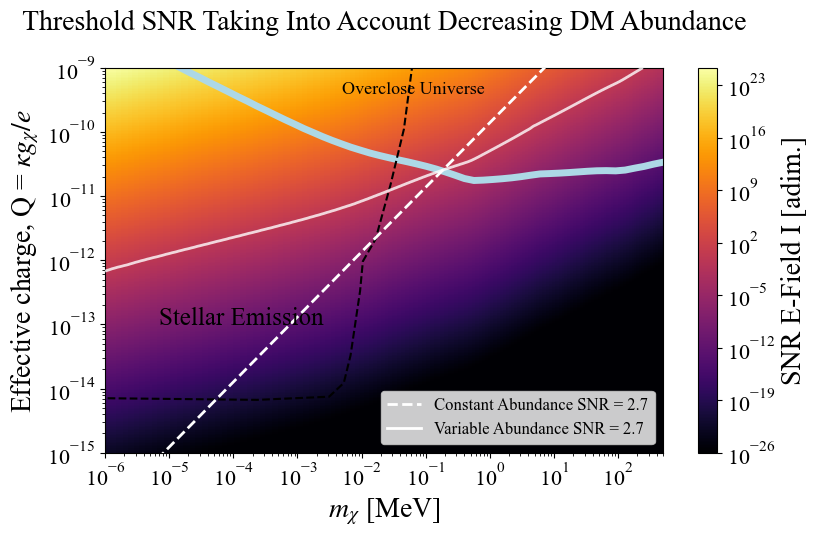

In [11]:
f, ax = plt.subplots()
f.set_size_inches(9, 5)

#im = ax.pcolormesh(np.log10(mlist),np.log10(Qlist),np.log10(snr),cmap="magma")
im = ax.pcolormesh(mlist,Qlist,snrI,cmap="inferno",norm="log",vmin = 10e-27)
ax.contour(mlist,Qlist,snrI,colors = ["white"],linewidths = 2,alpha = 0.8,norm = colors.LogNorm(), levels = [1],zorder = 3)
ax.loglog( I[0]/10**3,I[1],lw = 2, color = "white",linestyle = "dashed",alpha = 1,label = "Constant Abundance SNR = 2.7",zorder = 3)
ax.loglog( 0,1,lw = 2, color = "white",alpha = 1,label = "Variable Abundance SNR = 2.7",zorder = 3)

cbar = f.colorbar(im)
cbar.set_label(r"SNR E-Field I [adim.]", fontsize = 20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-6,10**(2.7)])
ax.loglog(mliststar,np.array([freeze_in_func(i) for i in mliststar]),lw = 5, color = "lightblue")

#ax.fill_between(mlist1,freeze_in,1,color = "k",)
#ax.fill_between(x/10**3,y,1, color = "gainsboro")
ax.loglog(x/10**3,y, lw = 1.5, linestyle = "dashed",color = "k")
ax.set_ylim([1e-15, 1e-9])
ax.set_ylabel(r'Effective charge, Q = $\kappa g_\chi/e$', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [MeV]', fontsize=20)
ax.text(0.000007, 0.0000000000001, r'Stellar Emission',rotation=0,fontsize=18)
ax.text(0.005, 0.0000000004, r'Overclose Universe',rotation=0,fontsize=13)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_title('Threshold SNR Taking Into Account Decreasing DM Abundance\n', fontsize=20)

#ax.scatter(0.05,1.8e-11,marker = (5,1),s = 80, color = "yellow", label = r"$\sim 0.05$")
#ax.scatter(0.000004,6e-15,marker = (5,1),s = 80, color = "lightgreen",label =r"$\sim 15$",zorder=4)
#ax.scatter(0.045,3.45*10**(-11),marker = (5,1),s = 80, color = "deepskyblue",label =r"$(m_\chi,Q)_{norm}\sim 1$",zorder=4)

#ax.text(0.000005, 0.0000000000015, r'Line of SNR=2.7',rotation=10,fontsize=12, color = "k")

ax.legend(loc='lower right',fontsize=12)
plt.show()


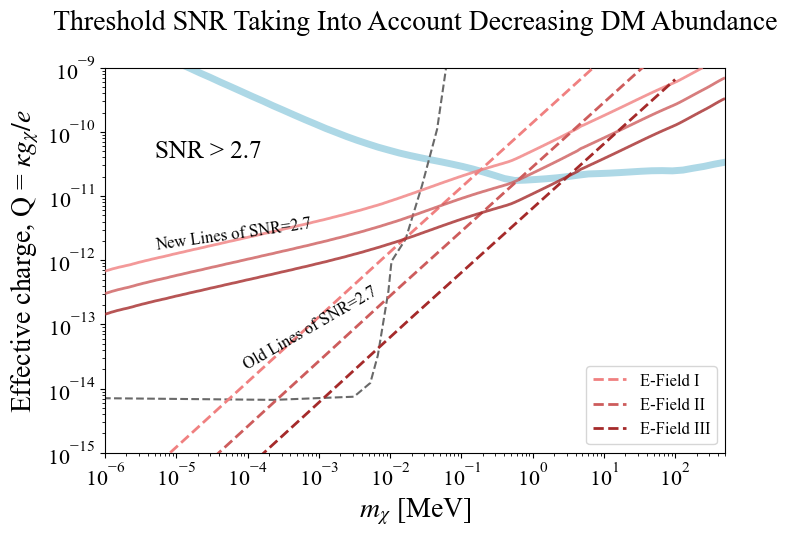

In [12]:
f, ax = plt.subplots()
f.set_size_inches(8, 5)

ax.contour(mlist,Qlist,snrI,colors = ["lightcoral"],linewidths = 2,alpha = 0.8,norm = colors.LogNorm(), levels = [1],zorder = 3)
ax.loglog( I[0]/10**3,I[1],lw = 2, color = "lightcoral",linestyle = "dashed",alpha = 1,label = "E-Field I",zorder = 3)
ax.contour(mlist,Qlist,snrII,colors = ["indianred"],linewidths = 2,alpha = 0.8,norm = colors.LogNorm(), levels = [1],zorder = 3)
ax.loglog( II[0]/10**3,II[1],lw = 2, color = "indianred",linestyle = "dashed",alpha = 1,label = "E-Field II",zorder = 3)
ax.contour(mlist,Qlist,snrIII,colors = ["brown"],linewidths = 2,alpha = 0.8,norm = colors.LogNorm(), levels = [1],zorder = 3)
ax.loglog( III[0]/10**3,III[1],lw = 2, color = "brown",linestyle = "dashed",alpha = 1,label = "E-Field III",zorder = 3)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-6,10**(2.7)])
ax.loglog(mliststar,np.array([freeze_in_func(i) for i in mliststar]),lw = 5, color = "lightblue")

#ax.fill_between(mlist1,freeze_in,1,color = "k",)
#ax.fill_between(x/10**3,y,1, color = "gainsboro")
ax.loglog(x/10**3,y, lw = 1.5, linestyle = "dashed",color = "dimgrey")
ax.set_ylim([1e-15, 1e-9])
ax.set_ylabel(r'Effective charge, Q = $\kappa g_\chi/e$', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [MeV]', fontsize=20)
#ax.text(0.000002, 0.00000000000003, r'Stellar Emission',rotation=0,fontsize=18,color = "dimgrey")
#ax.text(0.005, 0.0000000004, r'Overclose Universe',rotation=0,fontsize=13,color = "dimgrey")
ax.text(0.000005, 0.00000000004, r'SNR > 2.7',rotation=0,fontsize=18,color = "k")
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_title('Threshold SNR Taking Into Account Decreasing DM Abundance\n', fontsize=20)

#ax.scatter(0.05,1.8e-11,marker = (5,1),s = 80, color = "yellow", label = r"$\sim 0.05$")
#ax.scatter(0.000004,6e-15,marker = (5,1),s = 80, color = "lightgreen",label =r"$\sim 15$",zorder=4)
#ax.scatter(0.045,3.45*10**(-11),marker = (5,1),s = 80, color = "deepskyblue",label =r"$(m_\chi,Q)_{norm}\sim 1$",zorder=4)

ax.text(0.000005, 0.0000000000015, r'New Lines of SNR=2.7',rotation=8,fontsize=12, color = "k")
ax.text(0.00008, 0.00000000000002, r'Old Lines of SNR=2.7',rotation=30,fontsize=12, color = "k")

ax.legend(loc='lower right',fontsize=12)
plt.show()


In [13]:
freeze_in=np.array([freeze_in_func(i) for i in mliststar])

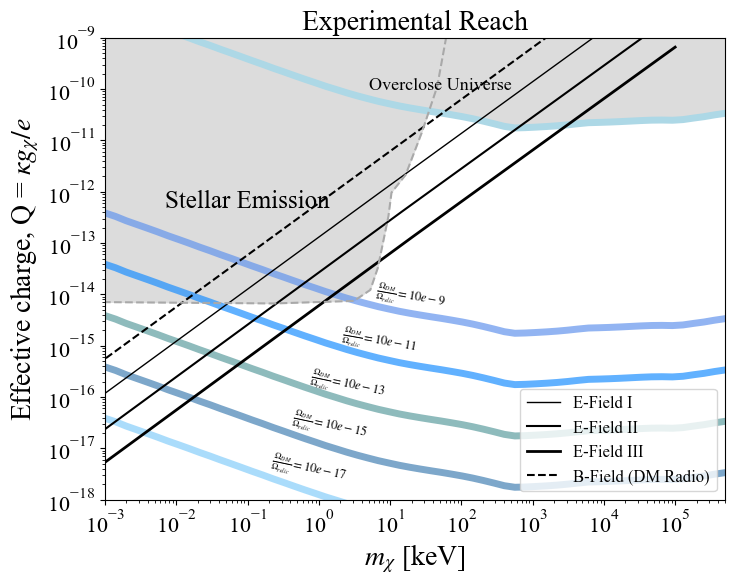

In [14]:
f, ax = plt.subplots()
f.set_size_inches(8, 6)

#im = ax.pcolormesh(np.log10(mlist),np.log10(Qlist),np.log10(snr),cmap="magma")
#im = ax.pcolormesh(mlist,Qlist,snr,cmap="twilight_shifted",norm="log",vmin=1e-9,vmax=10)
#cbar = f.colorbar(im)
#cbar.set_label(r"SNR$_{norm}$ [adim.]", fontsize = 20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-3,10**(5.7)])
ax.loglog(mliststar*10**3,freeze_in,lw = 5, color = "lightblue")

#ax.loglog(mlist2, Qm9,c='plum',lw=5,label = r'$\frac{\Omega_{DM}}{\Omega_{relic}} = 10e-13$')
ax.loglog(mliststar*10**3, freeze_in/10**4,c='cornflowerblue',lw=5,alpha = 0.7)
ax.loglog(mliststar*10**3, freeze_in/10**5,c='dodgerblue',lw=5,alpha = 0.7)
ax.loglog(mliststar*10**3, freeze_in/10**6,c='cadetblue',lw=5,alpha = 0.7)
ax.loglog(mliststar*10**3, freeze_in/10**7,c='steelblue',lw=5, alpha = 0.7)
ax.loglog(mliststar*10**3, freeze_in/10**8,c='lightskyblue',lw=5,alpha = 0.7)

ax.loglog( I[0],I[1],lw = 1, color = "k",alpha = 1,label = "E-Field I")
ax.loglog( II[0],II[1],lw = 1.5, color = "k",alpha = 1,label = "E-Field II")
ax.loglog( III[0],III[1],lw = 2, color = "k",alpha = 1,label = "E-Field III")
ax.loglog( BDM[0],BDM[1],lw = 1.5, color = "k",linestyle = "dashed",alpha = 1,label = "B-Field (DM Radio)")

ax.fill_between(mliststar*10**3,freeze_in,1,color = "gainsboro")
ax.fill_between(x,y,1, color = "gainsboro")
#ax.fill_between(I[0]/10**3,I[1],1, color = "gainsboro")
#ax.fill_between(III[0]/10**3,III[1],10e-20, color = "gainsboro")
ax.loglog(x,y, lw = 1.5, linestyle = "dashed",color = "darkgrey")
ax.set_ylim([1e-18, 1e-9])
ax.set_ylabel(r'Effective charge, Q = $\kappa g_\chi/e$', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [keV]', fontsize=20)

ax.text(0.000007*10**3, 0.0000000000005, r'Stellar Emission',rotation=0,fontsize=18)
ax.text(0.005*10**3, 0.0000000001, r'Overclose Universe',rotation=0,fontsize=13)
ax.text(0.0007*10**3, 0.00000000000000011, r'$\frac{\Omega_{DM}}{\Omega_{relic}} = 10e-13$',rotation=-12,fontsize=9)
ax.text(0.0004*10**3, 0.000000000000000017, r'$\frac{\Omega_{DM}}{\Omega_{relic}} = 10e-15$',rotation=-12,fontsize=9)
ax.text(0.0002*10**3, 0.0000000000000000025, r'$\frac{\Omega_{DM}}{\Omega_{relic}} = 10e-17$',rotation=-12,fontsize=9)
ax.text(0.002*10**3, 0.0000000000000008, r'$\frac{\Omega_{DM}}{\Omega_{relic}} = 10e-11$',rotation=-10,fontsize=9)
ax.text(0.006*10**3, 0.000000000000006, r'$\frac{\Omega_{DM}}{\Omega_{relic}} = 10e-9$',rotation=-10,fontsize=9)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_title('Experimental Reach', fontsize=20)

ax.legend(loc='lower right',fontsize=12)
plt.show()

In [15]:
print(SNR(47.5/10**3,3.14e-11))
print(SNR(185/10**3,2.64e-11))
print(SNR(678/10**3,2e-11))
print((1.877e-11/2.88)**4*(0.045/(3.45*10**(-11)))**4)

305.9140316952773
1.3218603068548282
0.003001803388092685
5.222287946278027e-09


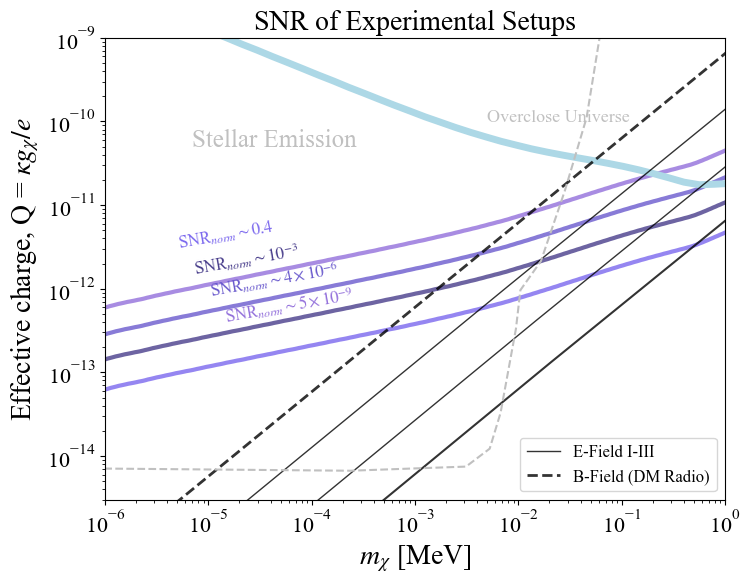

In [16]:
f, ax = plt.subplots()
f.set_size_inches(8, 6)

im = ax.contour(mlist,Qlist,snrI,colors = ["mediumslateblue","darkslateblue","slateblue","mediumpurple"],linewidths = 3,alpha = 0.8,norm = colors.LogNorm(), levels = [5.22e-09,4e-06,0.001,0.36258382823749774])
#cbar = f.colorbar(im, norm = "log")
#cbar.set_label(r"SNR$_{norm}$ [adim.]", fontsize = 20)
#ax.clabel(im, inline=True, fontsize=10)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-6,1])
ax.loglog(mliststar,freeze_in,lw = 5, color = "lightblue")

ax.loglog( I[0]/10**3,I[1],lw = 1, color = "k",alpha = 0.8,label = "E-Field I-III")
ax.loglog( II[0]/10**3,II[1],lw = 1, color = "k",alpha = 0.8)
ax.loglog( III[0]/10**3,III[1],lw = 1.5, color = "k",alpha = 0.8)
ax.loglog( BDM[0]/10**3,BDM[1],lw = 2, color = "k",linestyle = "dashed",alpha = 0.8,label = "B-Field (DM Radio)")

#ax.fill_between(mlist1,freeze_in,1,color = "gainsboro",)
#ax.fill_between(x/10**3,y,1, color = "gainsboro")
ax.loglog(x/10**3,y, lw = 1.5, linestyle = "dashed",color = "silver")
ax.set_ylim([3e-15, 1e-9])
ax.set_ylabel(r'Effective charge, Q = $\kappa g_\chi/e$', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [MeV]', fontsize=20)
ax.text(0.000007, 0.00000000005, r'Stellar Emission',rotation=0,fontsize=18,color = "silver")
ax.text(0.005, 0.0000000001, r'Overclose Universe',rotation=0,fontsize=13, color = "silver")
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_title('SNR of Experimental Setups', fontsize=20)

ax.text(0.000005, 0.000000000003, r'SNR$_{norm}\sim0.4$',rotation=10,fontsize=12, color = "mediumslateblue")
ax.text(0.000007, 0.0000000000015, r'SNR$_{norm}\sim10^{-3}$',rotation=10,fontsize=12, color = "darkslateblue")
ax.text(0.00001, 0.0000000000008, r'SNR$_{norm}\sim4\times 10^{-6}$',rotation=10,fontsize=12, color = "slateblue")
ax.text(0.000014, 0.0000000000004, r'SNR$_{norm}\sim 5\times 10^{-9}$',rotation=10,fontsize=12, color = "mediumpurple")

ax.legend(loc='lower right',fontsize=12)
plt.show()

## Millicharge Density

In [17]:
mlistn = np.logspace(-6,2.7, num = 200)
Qlistn = np.logspace(-19,-9, num = 200)


rho_chi = np.empty((200,200))
for i in range(200):
    for n in range(200):
        if Qlistn[i]>1e-12 and mlistn[n]<1e-2:
            rho_chi[i][n] = 10e-10
        elif Qlistn[i]>7e-11:
            rho_chi[i][n] = 10e-10
        else:
            rho_chi[i][n] = 0.4*(0.045/(3.45*10**(-11)))**2*Qlistn[i]**4/(mlistn[n]*freeze_in_func(mlistn[n]))**2

In [18]:
def milli(m,Q):
    return 0.4*(0.045/(3.45*10**(-11)))**2*((Q**4/(m*freeze_in_func(m))**2))

print(milli(0.05,1.8e-11))
print(milli(0.00001,1.1e-14))
print(milli(0.045,3.45*10**(-11)))

0.023998651806220198
6.664039488414359e-11
0.38234469420829836


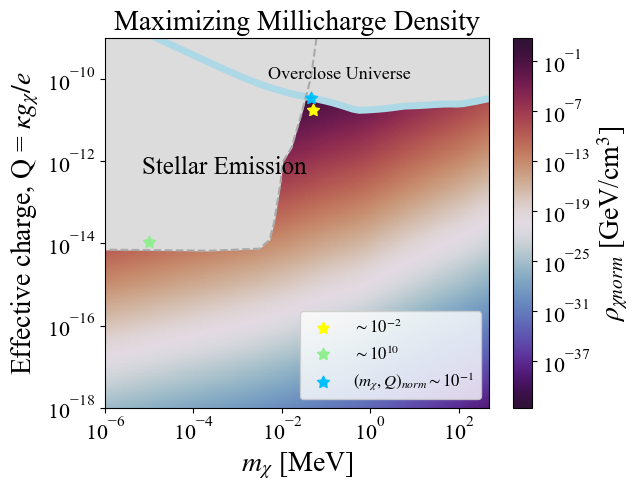

In [19]:
f, ax = plt.subplots()
f.set_size_inches(6.2, 4.8)

#im = ax.pcolormesh(np.log10(mlist),np.log10(Qlist),np.log10(snr),cmap="magma")
im = ax.pcolormesh(mlistn,Qlistn,rho_chi,cmap="twilight_shifted",norm="log")
cbar = f.colorbar(im)
cbar.set_label(r"$\rho_{\chi norm}$ [GeV/cm$^3$]", fontsize = 20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-6,10**(2.7)])
ax.loglog(mliststar,freeze_in,lw = 5, color = "lightblue")
ax.fill_between(mliststar,freeze_in,1,color = "gainsboro",)
ax.fill_between(x/10**3,y,1, color = "gainsboro")
ax.loglog(x/10**3,y, lw = 1.5, linestyle = "dashed",color = "darkgrey")
ax.set_ylim([1e-18, 1e-9])
ax.set_ylabel(r'Effective charge, Q = $\kappa g_\chi/e$', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [MeV]', fontsize=20)
ax.text(0.000007, 0.0000000000005, r'Stellar Emission',rotation=0,fontsize=18)
ax.text(0.005, 0.0000000001, r'Overclose Universe',rotation=0,fontsize=13)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_title('Maximizing Millicharge Density', fontsize=20)

ax.scatter(0.05,1.8e-11,marker = (5,1),s = 80, color = "yellow", label = r"$\sim 10^{-2}$")
ax.scatter(0.00001,1.1e-14,marker = (5,1),s = 80, color = "lightgreen",label =r"$\sim 10^{10}$")
ax.scatter(0.045,3.45*10**(-11),marker = (5,1),s = 80, color = "deepskyblue",label =r"$(m_\chi,Q)_{norm}\sim 10^{-1}$",zorder=4)

ax.legend(loc='lower right',fontsize=12)
plt.show()


In [20]:

nx = np.empty((200,200))
for i in range(200):
    for n in range(200):
        nx[i][n] = (0.4*10**3/mlistn[n])*(Qlistn[i]/(freeze_in_func(mlistn[n])))**2

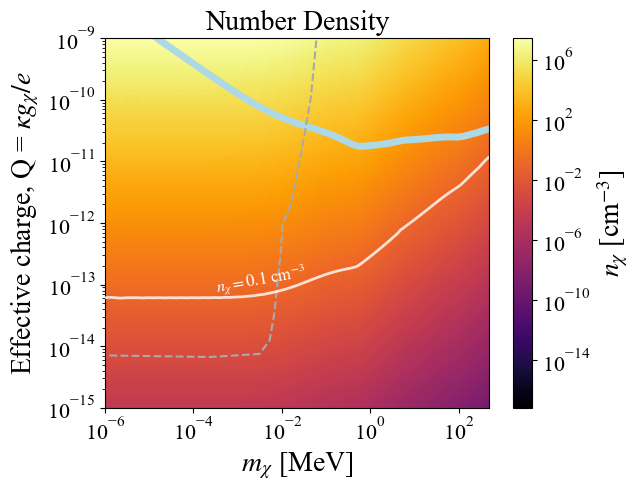

In [21]:
f, ax = plt.subplots()
f.set_size_inches(6.2, 4.8)

#im = ax.pcolormesh(np.log10(mlist),np.log10(Qlist),np.log10(snr),cmap="magma")
im = ax.pcolormesh(mlistn,Qlistn,nx,cmap="inferno",norm="log")
ax.contour(mlistn,Qlistn,nx,colors = ["white"],linewidths = 2,alpha = 0.8,norm = colors.LogNorm(), levels = [0.1],zorder = 3)
cbar = f.colorbar(im)
cbar.set_label(r"$n_\chi$ [cm$^{-3}$]", fontsize = 20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-6,10**(2.7)])
ax.loglog(mliststar,freeze_in,lw = 5, color = "lightblue")

ax.loglog(x/10**3,y, lw = 1.5, linestyle = "dashed",color = "darkgrey")
ax.set_ylim([1e-15, 1e-9])
ax.set_ylabel(r'Effective charge, Q = $\kappa g_\chi/e$', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [MeV]', fontsize=20)

ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
ax.set_title('Number Density', fontsize=20)
ax.text(0.0003, 0.000000000000075, r'$n_\chi=0.1$ cm$^{-3}$',rotation=10,fontsize=12, color = "white")

plt.show()

In [22]:
print(x)

[2.24615239e-04 2.35551780e-01 3.11433099e+00 5.27812829e+00
 6.72618978e+00 9.47495282e+00 1.04639719e+01 1.65244177e+01
 2.81454841e+01 4.57134615e+01 6.13729119e+01 6.76546622e+01
 1.08298163e+03]


# Official Plots

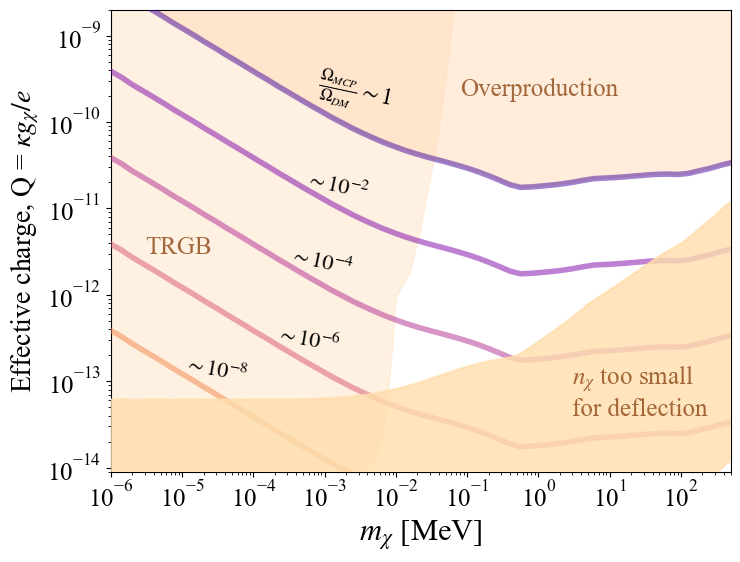

In [295]:
cmap = plt.get_cmap('plasma')
cmap2 = plt.get_cmap('viridis')
cmap3 = plt.get_cmap("cividis")

f, ax = plt.subplots()
f.set_size_inches(8, 6)

#im = ax.pcolormesh(np.log10(mlist),np.log10(Qlist),np.log10(snr),cmap="magma")
#im = ax.pcolormesh(mlist,Qlist,snr,cmap="twilight_shifted",norm="log",vmin=1e-9,vmax=10)
#cbar = f.colorbar(im)
#cbar.set_label(r"SNR$_{norm}$ [adim.]", fontsize = 20)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-6,10**(2.7)])
l = 4
a = 0.5
ax.loglog(mliststar,freeze_in,lw = l, color = cmap(0.1),zorder = 3, alpha = a)

#ax.loglog(mlist2, Qm9,c='plum',lw=5,label = r'$\frac{\Omega_{DM}}{\Omega_{relic}} = 10e-13$')
ax.loglog(mliststar, freeze_in/10,c=cmap(0.25),lw=l,alpha = a,zorder = 3)
ax.loglog(mliststar, freeze_in/100,c=cmap(0.4),lw=l,alpha = a,zorder = 3)
ax.loglog(mliststar, freeze_in/1000,c=cmap(0.55),lw=l, alpha = a,zorder = 3)
ax.loglog(mliststar, freeze_in/10000,c=cmap(0.7),lw=l,alpha = a,zorder = 3)
#ax.loglog(mlist2, Qm13/0.1,c='blue',lw=l,alpha = 1,zorder = 3)

#ax.fill_between(x/10**,10e-14,1, color = "whitesmoke",zorder = 0)
ax.fill_between(x/10**3,y,1, color = "bisque",alpha = 0.5,zorder = 0)
ax.fill_between(mliststar,freeze_in,1,color = "peachpuff",alpha = 0.5,zorder = 1)
#ax.fill_between(I[0]/10**3,I[1],1, color = "gainsboro")
#ax.fill_between(III[0]/10**3,III[1],10e-20, color = "gainsboro")
#ax.loglog(x,y, lw = 1, linestyle = "dashed",color = "gainsboro")
ax.set_ylim([9e-15, 2e-9])
ax.set_ylabel(r'Effective charge, Q = $\kappa g_\chi/e$', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [MeV]', fontsize=22)

ax.text(0.000003, 0.000000000003, r'TRGB',rotation=0,fontsize=18,color = "saddlebrown",alpha = 0.8)
ax.text(0.08, 0.0000000002, r'Overproduction',rotation=0,fontsize=18,color = "saddlebrown",alpha = 0.8)
ax.text(0.0007, 0.00000000016, r'$\frac{\Omega_{MCP}}{\Omega_{DM}} \sim 1$',rotation=-12,fontsize=17)
ax.text(0.0005, 0.000000000013, r'$\sim 10^{-2}$',rotation=-12,fontsize=16)
ax.text(0.0003, 0.0000000000017, r'$\sim 10^{-4}$',rotation=-12,fontsize=16)
ax.text(0.0002, 0.00000000000022, r'$\sim 10^{-6}$',rotation=-10,fontsize=16)
ax.text(0.00001, 0.0000000000001, r'$\sim 10^{-8}$',rotation=-10,fontsize=16)
#ax.text(0.0001, 0.000000000000003, r'$\sim 10^{-5}$',rotation=-10,fontsize=11)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

cont = ax.contourf(mlistn,Qlistn,nx,linestyles = ["None"],colors = "navajowhite",alpha = 0.8,norm = colors.LogNorm(), levels = [0.0000001,0.1],zorder = 3)
cont = ax.contour(mlistn,Qlistn,nx,linestyles = ["solid"],colors = "navajowhite",linewidths = 2,alpha = 0.6,norm = colors.LogNorm(), levels = [0.1],zorder = 3)
ax.text(30/10, 0.00000000000004, '$n_\chi$ too small\nfor deflection',rotation=0,fontsize=18, color = "saddlebrown",alpha = 0.8)

#ax.fill_between(mlist,nx,10e-30,color = "gainsboro")

#ax.legend(loc='lower right',fontsize=12)
plt.show()

In [325]:
def sigma_to_Q(se,mx):
    mu_e = me*mx/(me+mx)
    return (alpha_em*me)**2*np.sqrt(se*cm2_conv/(16*np.pi))/(alpha_em*mu_e)

def s_e(Q,mx):
    mu_e = me*mx/(me+mx)
    return (1/cm2_conv)*Q**2*16*np.pi*(alpha_em*mu_e)**2/(alpha_em*me)**4

In [333]:
file_path = "datadump/SENSEI@SNOLAB.csv"
array_data = load_csv(file_path)
#array_data = array_data[array_data[:,0].argsort()]
#print(array_data[-1])
SENx = np.empty(len(array_data))
SENy = np.empty(len(array_data))
for i in range(len(array_data)):
    SENx[i]=array_data[i][0]
    SENy[i]=sigma_to_Q(array_data[i][1],array_data[i][0])

file_path = "datadump/basin.csv"
array_data = load_csv(file_path)
#array_data = array_data[array_data[:,0].argsort()]
#print(array_data[-1])
sunx = np.empty(len(array_data))
suny = np.empty(len(array_data))
for i in range(len(array_data)):
    sunx[i]=array_data[i][0]/10**3
    suny[i]=array_data[i][1]

file_path = "datadump/OSCURA.csv"
array_data = load_csv(file_path)
#array_data = array_data[array_data[:,0].argsort()]
#print(array_data[-1])
OSx = np.empty(len(array_data))
OSy = np.empty(len(array_data))
for i in range(len(array_data)):
    OSx[i]=array_data[i][0]
    OSy[i]=sigma_to_Q(array_data[i][1],array_data[i][0])

file_path = "datadump/AlSC.csv"
array_data = load_csv(file_path)
#array_data = array_data[array_data[:,0].argsort()]
#print(array_data[-1])
ASx = np.empty(len(array_data))
ASy = np.empty(len(array_data))
for i in range(len(array_data)):
    ASx[i]=array_data[i][0]
    ASy[i]=sigma_to_Q(array_data[i][1],array_data[i][0])

file_path = "datadump/GaAS.csv"
array_data = load_csv(file_path)
#array_data = array_data[array_data[:,0].argsort()]
#print(array_data[-1])
GAx = np.empty(len(array_data))
GAy = np.empty(len(array_data))
for i in range(len(array_data)):
    GAx[i]=array_data[i][0]
    GAy[i]=sigma_to_Q(array_data[i][1],array_data[i][0])

file_path = "datadump/BNQ-TTF.csv"
array_data = load_csv(file_path)
#array_data = array_data[array_data[:,0].argsort()]
#print(array_data[-1])
BTx = np.empty(len(array_data))
BTy = np.empty(len(array_data))
for i in range(len(array_data)):
    BTx[i]=array_data[i][0]
    BTy[i]=sigma_to_Q(array_data[i][1],array_data[i][0])


file_path = "datadump/Al2O3.csv"
array_data = load_csv(file_path)
#array_data = array_data[array_data[:,0].argsort()]
#print(array_data[-1])
AOx = np.empty(len(array_data))
AOy = np.empty(len(array_data))
for i in range(len(array_data)):
    AOx[i]=array_data[i][0]
    AOy[i]=sigma_to_Q(array_data[i][1],array_data[i][0])


file_path = "datadump/supernova.csv"
array_data = load_csv(file_path)
#array_data = array_data[array_data[:,0].argsort()]
#print(array_data[-1])
superx = np.empty(len(array_data))
supery = np.empty(len(array_data))
print(array_data)

for i in range(len(array_data)):
    superx[i]=array_data[i][0]
    supery[i]=array_data[i][1]

[[1.75611920e+01 1.74967645e-09]
 [5.55333651e+01 1.74967645e-09]
 [1.55317595e+02 1.74967645e-09]
 [1.02617317e+03 1.74967645e-09]
 [1.23100000e+03 1.74967645e-09]]


In [334]:
arrx = OSx
arry = OSy
newOS = np.zeros(len(arrx))
for i in range(len(arrx)):
    abun = freeze_in_func(arrx[i])
    var = scipy.optimize.fsolve(lambda Q:arry[i]**2-(Q/abun)**2*Q**2, arrx[i]*10**2)[0]
    newOS[i] = var

arrx = ASx
arry = ASy
newAS = np.zeros(len(arrx))
for i in range(len(arrx)):
    abun = freeze_in_func(arrx[i])
    var = scipy.optimize.fsolve(lambda Q:arry[i]**2-(Q/abun)**2*Q**2, arrx[i]*10**2)[0]
    newAS[i] = var

arrx = GAx
arry = GAy
newGA = np.zeros(len(arrx))
for i in range(len(arrx)):
    abun = freeze_in_func(arrx[i])
    var = scipy.optimize.fsolve(lambda Q:arry[i]**2-(Q/abun)**2*Q**2, arrx[i]*10**2)[0]
    newGA[i] = var

arrx = BTx
arry = BTy
newBT = np.zeros(len(arrx))
for i in range(len(arrx)):
    abun = freeze_in_func(arrx[i])
    var = scipy.optimize.fsolve(lambda Q:arry[i]**2-(Q/abun)**2*Q**2, arrx[i]*10**2)[0]
    newBT[i] = var

arrx = AOx
arry = AOy
newAO = np.zeros(len(arrx))
for i in range(len(arrx)):
    abun = freeze_in_func(arrx[i])
    var = scipy.optimize.fsolve(lambda Q:arry[i]**2-(Q/abun)**2*Q**2, arrx[i]*10**2)[0]
    newAO[i] = var

print(newAO)

[4.82029668e-12 3.68919300e-12 2.82807525e-12 2.31582428e-12
 1.85475649e-12 1.38247137e-12 1.09755676e-12 9.34724393e-13
 8.49651204e-13 8.12072975e-13 7.86653109e-13 8.19176076e-13
 8.37169723e-13]


In [416]:
from matplotlib.colors import ListedColormap, LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

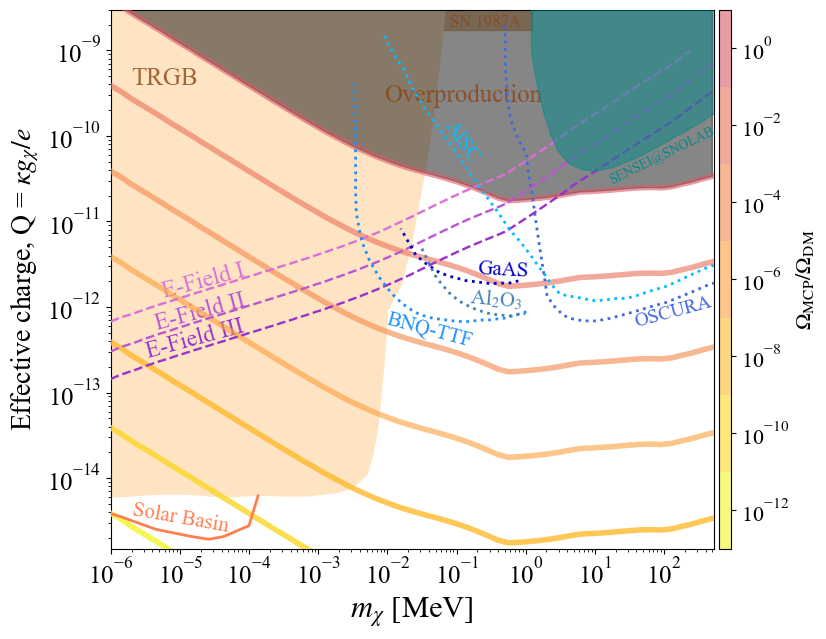

0.0008163265306122449


In [454]:
f, ax = plt.subplots()
f.set_size_inches(8, 7)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1e-6,10**(2.72)])

linestyle = "dotted"
cmap1 = plt.get_cmap("plasma")

c11 = "orchid" #"limegreen"
c22 = "mediumorchid"#"mediumseagreen"
c33 = "darkorchid"#"seagreen"
ax.contour(mlist,Qlist,snrI,colors = [c11],linewidths = 1.7,alpha = 1,norm = colors.LogNorm(), levels = [1],zorder = 4,linestyles = ["dashed"])
#ax.loglog( I[0]/10**3,I[1],lw = 2, color = "lightcoral",linestyle = "dashed",alpha = 1,label = "E-Field I",zorder = 3)
ax.contour(mlist,Qlist,snrII,colors = [c22],linewidths = 1.7,alpha = 1,norm = colors.LogNorm(), levels = [1],zorder = 4,linestyles = ["dashed"])
#ax.loglog( II[0]/10**3,II[1],lw = 2, color = "indianred",linestyle = "dashed",alpha = 1,label = "E-Field II",zorder = 3)
ax.contour(mlist,Qlist,snrIII,colors = [c33],linewidths = 1.7,alpha = 1,norm = colors.LogNorm(), levels = [1],zorder = 4,linestyles = ["dashed"])
#ax.loglog( III[0]/10**3,III[1],lw = 2, color = "brown",linestyle = "dashed",alpha = 1,label = "E-Field III",zorder = 3)


ax.text(0.000005, 0.0000000000013, r'E-Field I',rotation=15,fontsize=17, color = c11)
ax.text(0.000004, 0.00000000000055, r'E-Field II',rotation=15,fontsize=17, color = c22)
ax.text(0.000003, 0.000000000000255, r'E-Field III',rotation=15,fontsize=17, color = c33)


li = 4
al = 0.6
ax.loglog(mliststar,freeze_in,lw = li, color = cmap1(0.57),zorder = 3, alpha = al)
ax.loglog(mliststar, freeze_in/10,c=cmap1(0.64),lw=li,alpha = al,zorder = 3)
ax.loglog(mliststar, freeze_in/100,c=cmap1(0.71),lw=li,alpha = al,zorder = 3)
ax.loglog(mliststar, freeze_in/1000,c=cmap1(0.78),lw=li, alpha = al,zorder = 3)
ax.loglog(mliststar, freeze_in/10000,c=cmap1(0.85),lw=li,alpha = 0.8,zorder = 3)
ax.loglog(mliststar, freeze_in/100000,c=cmap1(0.92),lw=li,alpha = 0.8,zorder = 3)
ax.loglog(mliststar, freeze_in/1000000,c=cmap1(0.99),lw=li,alpha = 0.8,zorder = 3)

ax.fill_between(superx/10**3,supery,1, color = "peru",alpha = 0.5,zorder = 0)
ax.fill_between(x/10**3,y,1, color = "bisque",alpha = 1,zorder = 0)
ax.fill_between(mliststar,freeze_in,1,color = "#0f0f0f",alpha = 0.5,zorder = 1)

ax.set_ylim([1.5e-15, 3e-9])
ax.set_ylabel(r'Effective charge, Q = $\kappa g_\chi/e$', fontsize=20)
ax.set_xlabel(r'$m_\chi$ [MeV]', fontsize=22)

l = 2
a = 0.8
c1 = 'steelblue'
c2 = 'royalblue'
c3 = 'dodgerblue'
c4 = 'deepskyblue'
c5 = 'mediumblue'

# constraints:

ax.loglog(AOx,newAO, color = c1, lw = l, linestyle = linestyle,zorder = 5)
ax.text(1.5e-1, 1e-12, r'Al$_2$O$_3$', rotation=-5, color=c1, fontsize=15,zorder = 5)

ax.loglog(OSx,newOS, color = c2, lw = l, linestyle = linestyle,zorder = 4)
ax.text(3.5e1, 6e-13, r'OSCURA', rotation=15, color=c2, fontsize=14,zorder = 4)

ax.fill_between(SENx,SENy,1, color = 'darkcyan', alpha=0.5,zorder=4)
ax.text(1.5e1, 2.8e-11, r'SENSEI@SNOLAB', rotation=26, color='darkcyan', fontsize=10,zorder = 4)

ax.loglog(BTx,newBT, color = c3, lw = l, linestyle = linestyle,zorder = 4)
ax.text(9e-3, 3.5e-13, r'BNQ-TTF', rotation=-15, color=c3, fontsize=15,zorder = 4)

ax.loglog(ASx,newAS, color = c4, lw = l, linestyle = linestyle,zorder = 4)
ax.text(6e-2, 5e-11, r'AlSC', rotation=-55, color=c4, fontsize=15,zorder = 4)

ax.loglog(GAx,newGA, color = c5, lw = l, linestyle = linestyle,zorder = 4)
ax.text(2e-1, 2.3e-12, r'GaAS', rotation=-3, color=c5, fontsize=15,zorder = 4)

ax.loglog(sunx,suny, color = 'coral', lw = l, linestyle = "solid",zorder = 4)
ax.text(2e-6, 2.4e-15, r'Solar Basin', rotation=-10, color='coral', fontsize=15,zorder = 4)

ax.text(0.000002, 4e-10, r'TRGB',rotation=0,fontsize=18,color = "saddlebrown",alpha = 0.8)
ax.text(0.009, 0.00000000025, r'Overproduction',rotation=0,fontsize=18,color = "saddlebrown",alpha = 0.8)
ax.text(0.08, 1.9e-9, r'SN 1987A',rotation=0,fontsize=12,color = "saddlebrown",alpha = 0.8)
#ax.text(0.000003, 0.00000000003, r'TRGB',rotation=0,fontsize=18)
#ax.text(0.008, 0.00000000006, r'Overproduction',rotation=0,fontsize=18)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
bounds = [1e-10,1e-8,1e-6,1e-4,1e-2,1]
color = [(cmap1(0.99),al),(cmap1(0.92),al),(cmap1(0.85),al),(cmap1(0.78),al),(cmap1(0.71),al),(cmap1(0.64),al),(cmap1(0.57),al)]
cmaps = ListedColormap(color)
norm = LogNorm(vmin=1e-13,vmax=10)
sm = plt.cm.ScalarMappable(cmap=cmaps, norm=norm)
sm.set_array([]) 
cbar = plt.colorbar(sm, cax=cax,ticks=[1e-12,1e-10, 1e-8,1e-6,1e-4,1e-2, 1])  # Adjust ticks as per your data
cbar.set_label(r'$\Omega_\text{MCP}/\Omega_\text{DM}$')

#ax.legend(loc='lower right',fontsize=12)
#ax.loglog(mliststar, freeze_in/35,c='k',lw=5, alpha = 0.3,zorder = 3)
plt.show()
print(1/35**2)


In [251]:
Tlist = np.logspace(2.6,-2.5, num=200)
g1 = np.array([(irr.gamma_trans(10e-12,0.000004,i)+irr.gamma_long(10e-12,0.000004,i)) for i in Tlist])
g2 = np.array([(irr.gamma_trans(10e-12,0.00004,i)+irr.gamma_long(10e-12,0.00004,i)) for i in Tlist])
g3 = np.array([(irr.gamma_trans(10e-12,0.0004,i)+irr.gamma_long(10e-12,0.0004,i)) for i in Tlist])
g4 = np.array([(irr.gamma_trans(10e-12,0.004,i)+irr.gamma_long(10e-12,0.004,i)) for i in Tlist])
g5 = np.array([(irr.gamma_trans(10e-12,0.04,i)+irr.gamma_long(10e-12,0.04,i)) for i in Tlist])

/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:217: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return fsolve(lambda w: Pi_t(T, k, w)+k**2-w**2, k)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:452: RuntimeWarning: overflow encountered in exp
  /(3*wt*mt**2 *(np.exp(wt/T)-1))
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:207: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return fsolve(lambda w: Pi_ell(T, k, w)-k**2, k)


/var/folders/q4/dzj8h81d2zl6rhvg1symbj7m0000gn/T/ipykernel_43515/1357398657.py:24: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *4e-6, 1), 1e-20,1e2, color='gray',linestyles=":", lw = 1.5)


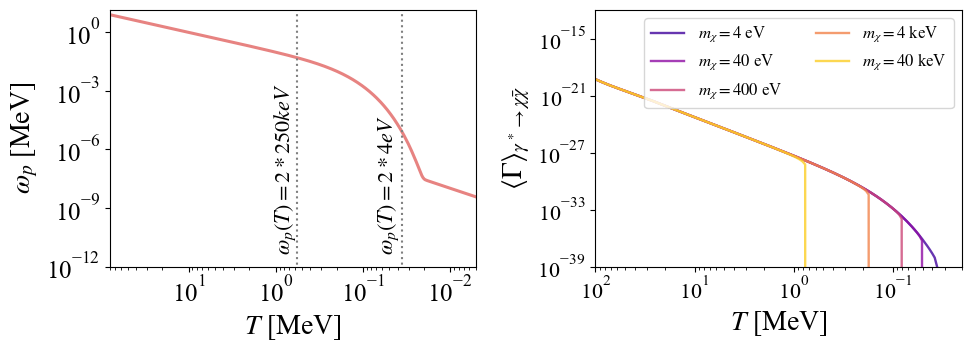

In [373]:
cmap = plt.get_cmap('plasma')
cmap2 = plt.get_cmap('viridis')


f, axs = plt.subplots(1,2)
alist = np.logspace(-1.9, 4.5,num = 500)
f.set_figwidth(10)
f.set_figheight(3.8)
#ax.loglog(irr.T(alist), relic40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='SlateBlue',label = 'Total')
#ax.loglog(irr.T(alist), relic_plas40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='mediumvioletred',label = '$\gamma$')

ax = axs[0]
ax.loglog(irr.T(alist), np.array([irr.wp(i) for i in irr.T(alist)]),lw=2.2,c=cmap(0.6),label = r'plasmon',alpha = 0.8)

ax.set_ylabel(r'$\omega_p$ [MeV]', fontsize=20)
ax.set_xlabel(r'$T$ [MeV]', fontsize=20)
#ax.set_title(r'$Plasma Frequency$', fontsize=18)
ax.set_xlim([80,0.005])
ax.set_ylim([1e-12, 14])
#ax.set_xticklabels(xticklabels,fontsize=16)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *4e-6, 1), 1e-20,1e2, color='gray',linestyles=":", lw = 1.5)

ax.text(0.07, 0.00000000001, r'$\omega_p(T) = 2 * 4eV$',rotation=90, fontsize=16)

ax.vlines(scipy.optimize.fsolve(lambda t: irr.wp(t)-2 *0.025, 1), 1e-20,1e2, color='gray',linestyles=":",lw = 1.5)

ax.text(1.1, 0.00000000001, r'$\omega_p(T) = 2 * 250keV$',rotation=90, fontsize=16)


#ax.legend(framealpha=1, loc='lower right', fontsize=8)

Tlist = np.logspace(2.6,-2.5, num=200)
ax = axs[1]
ax.loglog(Tlist, g1,label='$m_\chi=4$ eV',lw = 1.7, c=cmap(0.1),alpha = 0.8)
ax.loglog(Tlist, g2,label='$m_\chi=40$ eV',lw = 1.7, c=cmap(0.3),alpha = 0.8)
ax.loglog(Tlist, g3,label='$m_\chi=400$ eV',lw = 1.7, c=cmap(0.5),alpha = 0.8)
ax.loglog(Tlist, g4,label='$m_\chi=4$ keV',lw = 1.7, c=cmap(0.7),alpha = 0.8)
ax.loglog(Tlist, g5,label='$m_\chi=40$ keV',lw = 1.7, c=cmap(0.9),alpha = 0.8)
ax.set_xlabel('$T$ [MeV]',fontsize=20)
ax.set_ylabel(r'$\langle\Gamma\rangle_{\gamma^*\rightarrow\chi\bar{\chi}}$',fontsize=20)
#ax.set_title("$Q=10e-12$keV")
ax.set_xlim([100,0.02])
ax.set_ylim([1e-39,1e-12])
ax.legend(ncol = 2,fontsize = 12, loc = "upper right")
f.tight_layout()
plt.show()